In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *
from plots import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [3]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    gram = tx.T.dot(tx)
    graminv = np.linalg.inv(gram)
    wopt = graminv.dot(tx.T).dot(y)
    return wopt

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    ls_w = least_squares(y, tx)
    ls_err = compute_loss(y, tx, ls_w, "MSE")
    w0, w1 = generate_w(50)
    grid_losses = grid_search(y, tx, w0, w1, "MSE")
    grid_err, grid_w0, grid_w1 = get_best_parameters(w0, w1, grid_losses)
    print("Least Squares:")
    print("Loss = ",ls_err, ", w = ", ls_w)
    print("Grid Search:")
    print("Loss = ",grid_err, ", w = ", [grid_w0, grid_w1])

test_your_least_squares()

Least Squares:
Loss =  15.3858878688 , w =  [ 73.293922    13.47971243]
Grid Search:
Loss =  18.7935410195 , w =  [71.428571428571416, 15.306122448979579]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [10]:
"""def build_poly(x, degree):
    polynomial basis functions for input data x, for j=0 up to j=degree.
    resarray = [x ** d for d in range(degree+1)]
    print("fuckayou")
    return np.array(resarray).T"""

print(build_poly(np.array([1, 2, 3]), 3).shape)

(3, 4)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.24965870360912137
Processing 4th experiment, degree=12, rmse=0.2557620172413158


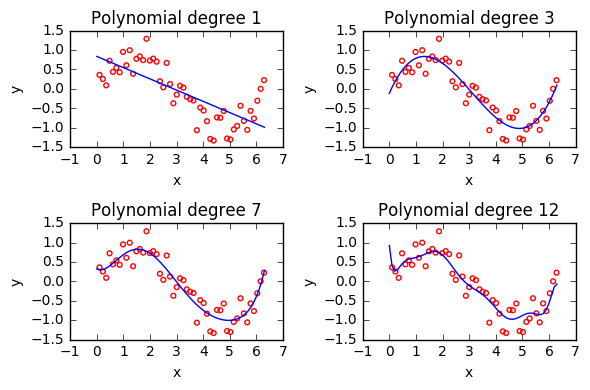

In [11]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        polyx = build_poly(x, degree)
        weight = least_squares(y, polyx)
        rmse = compute_loss(y, polyx, weight, "RMSE")

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [29]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    #print(x.shape, y.shape)
    N = x.shape[0]
    ksplit = np.round(N * ratio)
    data = np.vstack((x, y)).T
    np.random.shuffle(data)
    traindata, valdata = data[:ksplit, :], data[ksplit:, :]
    return traindata[:, 0], traindata[:, 1], valdata[:, 0], valdata[:, 1]

    
    """
    Following implentation is only if x is a matrix, not a vector
    d = x.shape[1]
    data = np.zeros((N, d+1))
    #print(data.shape)
    data[:, :-1] = x
    #print(data[:, -1])
    data[:, -1] = y
    #print(data)
    ksplit = np.round(N * ratio)
    #print(ksplit)
    np.random.shuffle(data)
    #print(data)
    traindata, valdata = data[:ksplit, :], data[ksplit:, :]
    #print(traindata, valdata)
    return traindata[:, :-1], traindata[:, -1], valdata[:, :-1], valdata[:, -1]"""

testx = np.array([1, 2, 3, 4])
testy = np.array([1, 4, 9, 16])
print(testx.shape, testy.shape)
split_data(testx, testy, 0.5)

(4,) (4,)


/home/hugo/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([4, 3]), array([16,  9]), array([1, 2]), array([1, 4]))

Then, test your `split_data` function below.

In [34]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    trainx, trainy, testx, testy = split_data(x, y, ratio, seed)
    #print(trainx.shape, trainy.shape, testx.shape, testy.shape)
    polytrainx = build_poly(trainx, degree)
    polytestx = build_poly(testx, degree)
    w = least_squares(trainy, polytrainx)
    rmse_tr = compute_loss(trainy, polytrainx, w, "RMSE")
    rmse_te = compute_loss(testy, polytestx, w, "RMSE")
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=1.153, Testing RMSE=1.111
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.908, Testing RMSE=1.865
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=3.828, Testing RMSE=3.241
proportion=0.1, degree=12, Training RMSE=21.405, Testing RMSE=69.183


/home/hugo/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


# Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    raise NotImplementedError

seed = 6
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)